# Cargamos el dataset y exploramos datos (EDA)

## Cheat sheet

* `T2M` --> Temperatura a 2 metros
* `RH2M` --> Humedad relativa a 2 metros
* `ALLSKY_KT` --> Clear sky
* `ALLSKY_SFC_DWN` --> Radiación global directa + difusa
* `PRECTOCORR` --> Lluvia
* `WS10M`--> Velocidad del viento a 10 metros
* `SZA` --> Ángulo Zenit del sol (90º es que no hay sol)


In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH = 'datasets/dataset_generacion_solar.csv'

gen = pd.read_csv(PATH)
gen.head(24)

,YEAR,MO,DY,HR,T2M,RH2M,ALLSKY_KT,ALLSKY_SFC_SW_DWN,PRECTOTCORR,WS10M,SZA,Energy PV system (Wh)
0,2022,1,26,0,7.49,91.54,-999.00,0.00,0.0,3.13,90.00,0
1,2022,1,26,1,7.39,90.57,-999.00,0.00,0.0,3.14,90.00,0
2,2022,1,26,2,7.31,88.36,-999.00,0.00,0.0,3.16,90.00,0
3,2022,1,26,3,7.33,84.90,-999.00,0.00,0.0,3.21,90.00,0
4,2022,1,26,4,7.49,80.21,-999.00,0.00,0.0,3.21,90.00,0
5,2022,1,26,5,7.80,74.86,-999.00,0.00,0.0,3.11,90.00,0
6,2022,1,26,6,8.11,69.57,-999.00,0.00,0.0,2.89,90.00,0
7,2022,1,26,7,8.57,65.11,0.33,25.27,0.0,2.55,86.85,1
8,2022,1,26,8,10.28,62.82,0.56,168.05,0.0,2.14,77.74,0
9,2022,1,26,9,11.90,51.43,0.69,333.60,0.0,1.94,69.85,0


In [423]:
gen.describe()

,YEAR,MO,DY,HR,T2M,RH2M,ALLSKY_KT,ALLSKY_SFC_SW_DWN,PRECTOTCORR,WS10M,SZA,Energy PV system (Wh)
count,7584.0,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000
mean,2022.0,6.548655,15.646229,11.499736,18.889305,73.326722,-464.852195,197.753009,1.734942,3.401245,73.473204,684.800633
std,0.0,3.007048,8.941159,6.923043,6.309097,14.283086,498.598141,271.959044,8.766052,1.902420,20.864263,994.772460
min,2022.0,1.000000,1.000000,0.000000,4.410000,28.520000,-999.000000,0.000000,0.000000,0.040000,18.970000,0.000000
25%,2022.0,4.000000,8.000000,5.750000,13.200000,62.700000,-999.000000,0.000000,0.000000,2.060000,58.922500,0.000000
50%,2022.0,7.000000,16.000000,11.500000,19.190000,74.780000,0.190000,13.265000,0.040000,3.080000,87.155000,19.000000
75%,2022.0,9.000000,23.000000,17.250000,24.160000,84.430000,0.560000,356.482500,0.710000,4.320000,90.000000,1240.250000
max,2022.0,12.000000,31.000000,23.000000,33.740000,100.000000,0.780000,974.350000,200.720000,11.750000,90.000000,3664.000000


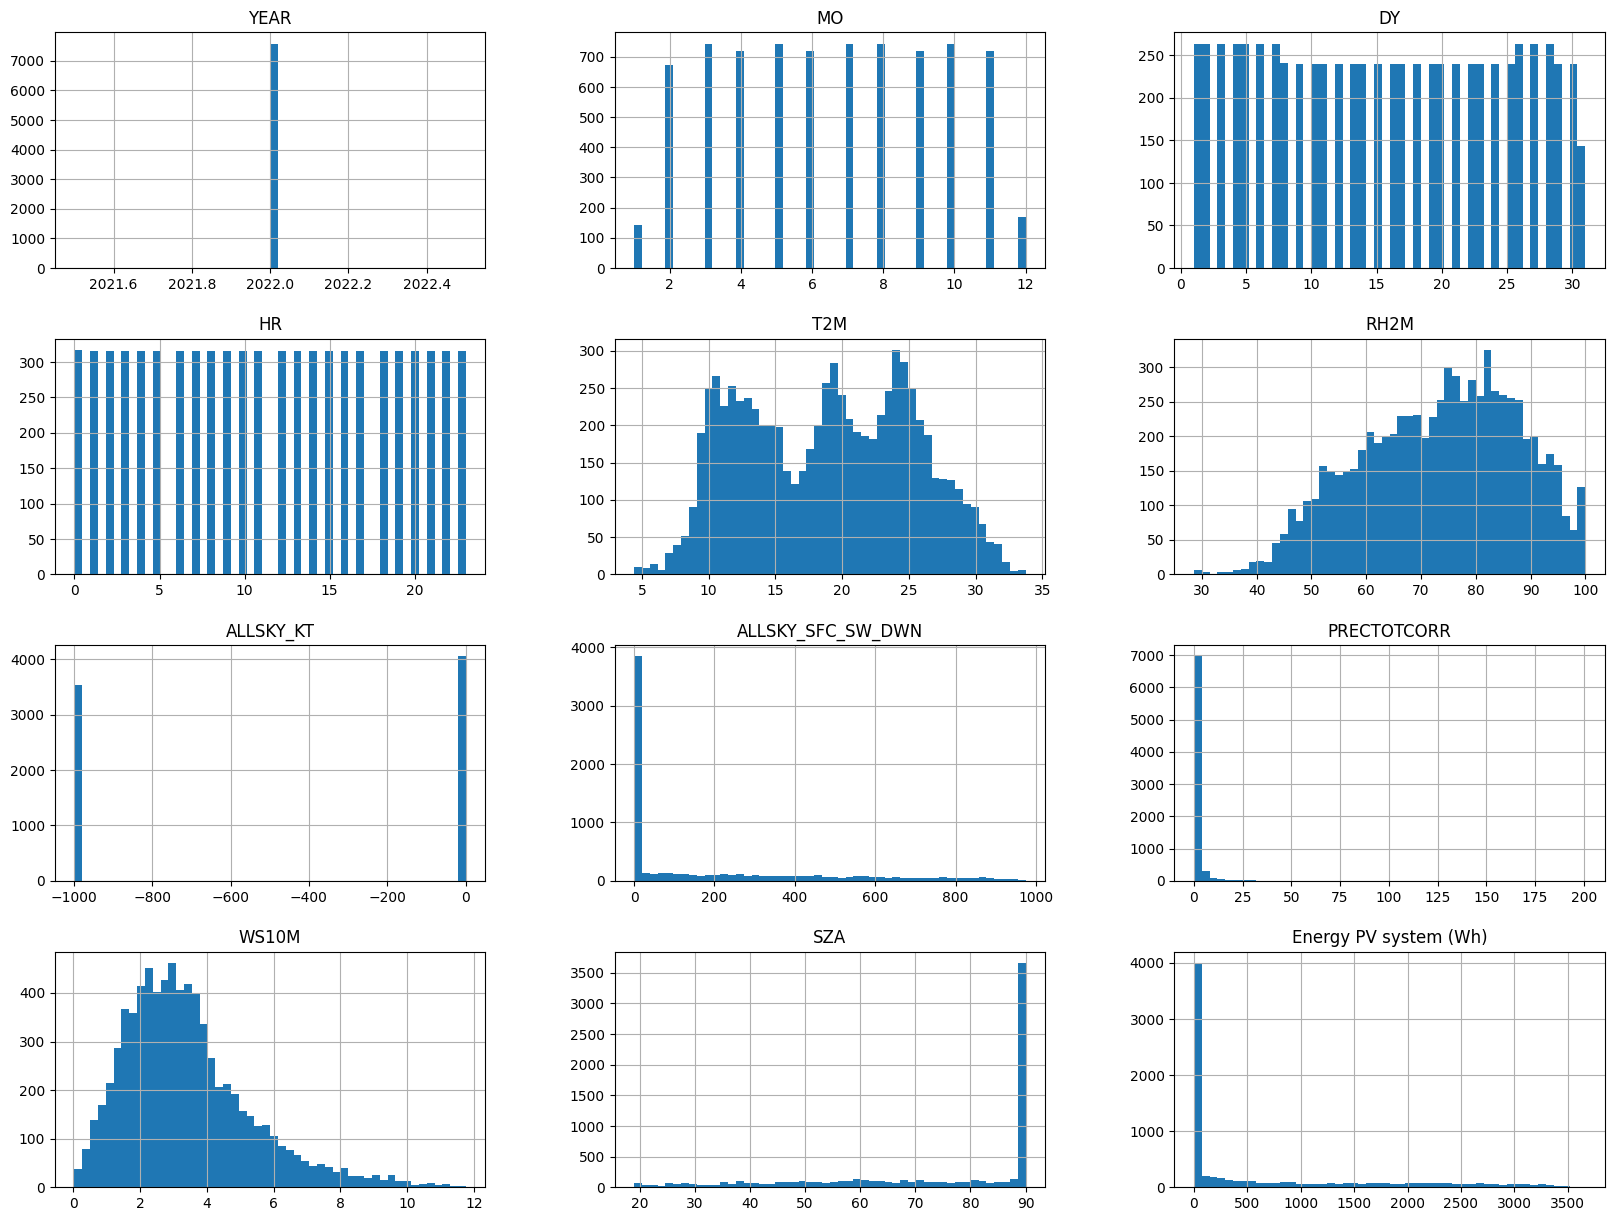

In [424]:
%matplotlib inline

gen.hist(bins=50, figsize=(20,15))
plt.show()

Vamos a eliminar valores de noche (Energy <= 1) y atardeceres y amaneceres

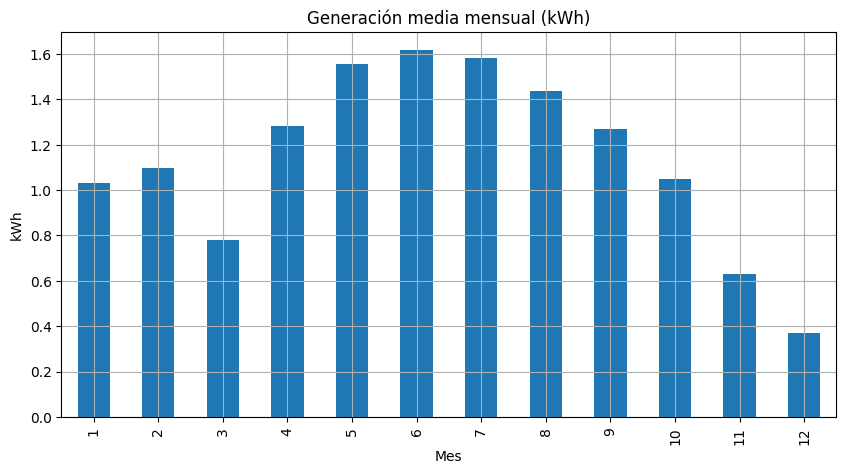

In [425]:
gen['Energy PV system (kWh)'] = gen['Energy PV system (Wh)'] / 1000

gen_true = gen[(gen['SZA'] < 90) & (gen['ALLSKY_KT'] != -999)]

monthly = gen_true.groupby('MO')['Energy PV system (kWh)'].mean()

monthly.plot(kind='bar', title='Generación media mensual (kWh)', ylabel='kWh', xlabel='Mes', figsize=(10,5))
plt.grid()

C:\Users\aleau\AppData\Local\Temp\ipykernel_14492\67464875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_true['Humidity_intervals'] = pd.cut(gen_true['RH2M'], bins=[0,20,40,60,80,100], labels=['0-20%','20-40%','40-60%','60-80%','80-100%'])
C:\Users\aleau\AppData\Local\Temp\ipykernel_14492\67464875.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  humidity = gen_true.groupby('Humidity_intervals')['Energy PV system (kWh)'].mean()


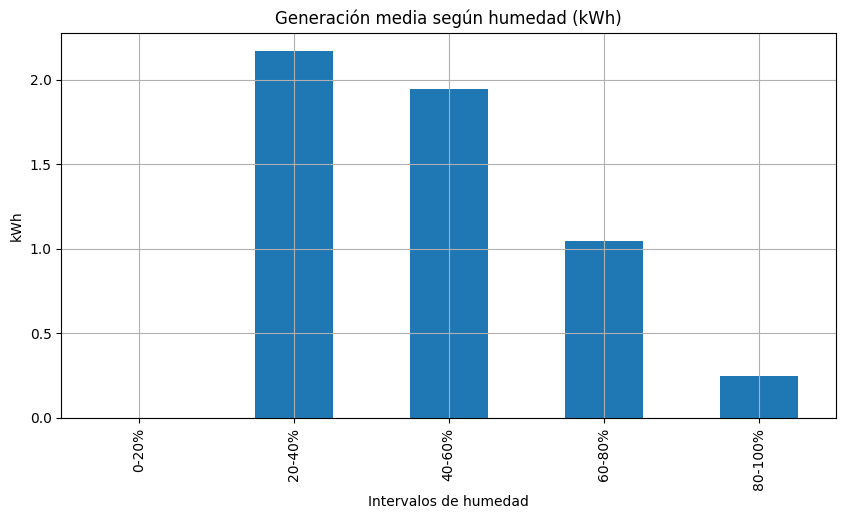

In [426]:
gen_true['Humidity_intervals'] = pd.cut(gen_true['RH2M'], bins=[0,20,40,60,80,100], labels=['0-20%','20-40%','40-60%','60-80%','80-100%'])
humidity = gen_true.groupby('Humidity_intervals')['Energy PV system (kWh)'].mean()
humidity.plot(kind='bar', title='Generación media según humedad (kWh)', ylabel='kWh', xlabel='Intervalos de humedad', figsize=(10,5))
plt.grid()

C:\Users\aleau\AppData\Local\Temp\ipykernel_14492\554081744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_true['wind_intervals'] = pd.cut(gen_true['WS10M'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12], labels=['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12'])
C:\Users\aleau\AppData\Local\Temp\ipykernel_14492\554081744.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind = gen_true.groupby('wind_intervals')['Energy PV system (kWh)'].mean()


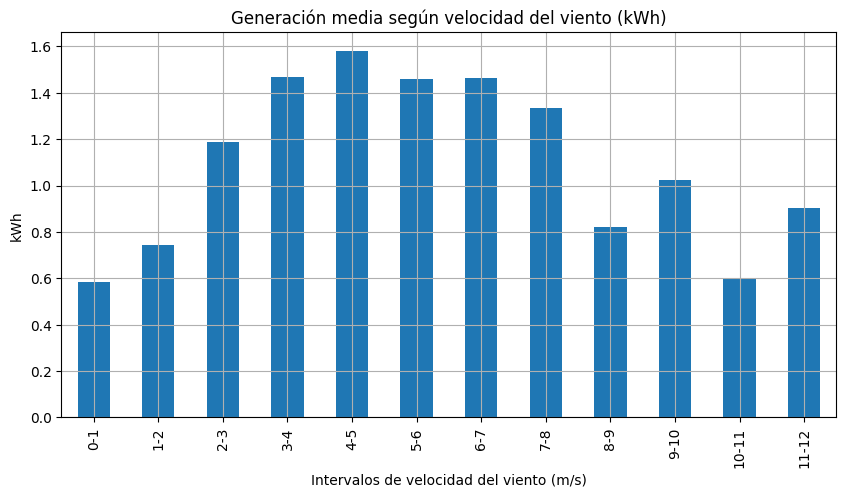

In [427]:
gen_true['wind_intervals'] = pd.cut(gen_true['WS10M'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12], labels=['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12'])
wind = gen_true.groupby('wind_intervals')['Energy PV system (kWh)'].mean()
wind.plot(kind='bar', title='Generación media según velocidad del viento (kWh)', ylabel='kWh', xlabel='Intervalos de velocidad del viento (m/s)', figsize=(10,5))
plt.grid()

C:\Users\aleau\AppData\Local\Temp\ipykernel_14492\1322897743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_true['rain_intervals'] = pd.cut(gen_true['PRECTOTCORR'], bins=[0,0.1,1,5], labels=['0-0.1','0.1-1','1-5'])
C:\Users\aleau\AppData\Local\Temp\ipykernel_14492\1322897743.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rain = gen_true.groupby('rain_intervals')['Energy PV system (kWh)'].mean()


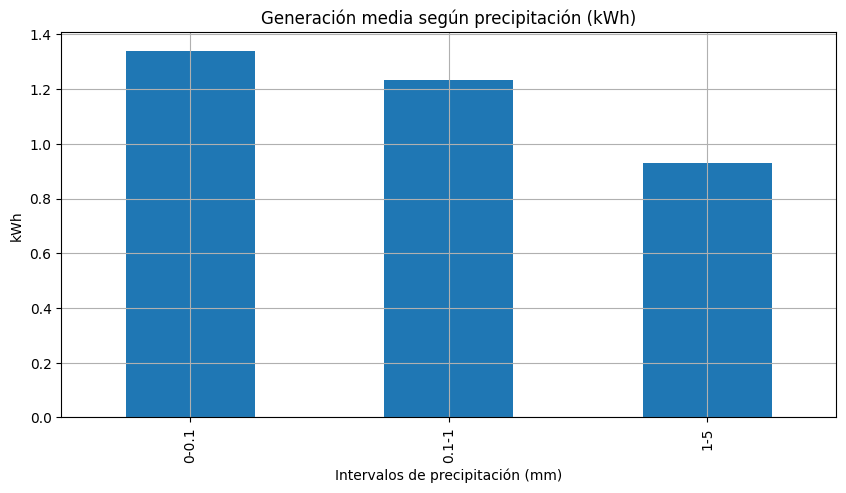

In [428]:
gen_true['rain_intervals'] = pd.cut(gen_true['PRECTOTCORR'], bins=[0,0.1,1,5], labels=['0-0.1','0.1-1','1-5'])
rain = gen_true.groupby('rain_intervals')['Energy PV system (kWh)'].mean()
rain.plot(kind='bar', title='Generación media según precipitación (kWh)', ylabel='kWh', xlabel='Intervalos de precipitación (mm)', figsize=(10,5))
plt.grid()

array([[<Axes: title={'center': 'YEAR'}>, <Axes: title={'center': 'MO'}>,
        <Axes: title={'center': 'DY'}>, <Axes: title={'center': 'HR'}>],
       [<Axes: title={'center': 'T2M'}>,
        <Axes: title={'center': 'RH2M'}>,
        <Axes: title={'center': 'ALLSKY_KT'}>,
        <Axes: title={'center': 'ALLSKY_SFC_SW_DWN'}>],
       [<Axes: title={'center': 'PRECTOTCORR'}>,
        <Axes: title={'center': 'WS10M'}>,
        <Axes: title={'center': 'SZA'}>,
        <Axes: title={'center': 'Energy PV system (Wh)'}>],
       [<Axes: title={'center': 'Energy PV system (kWh)'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

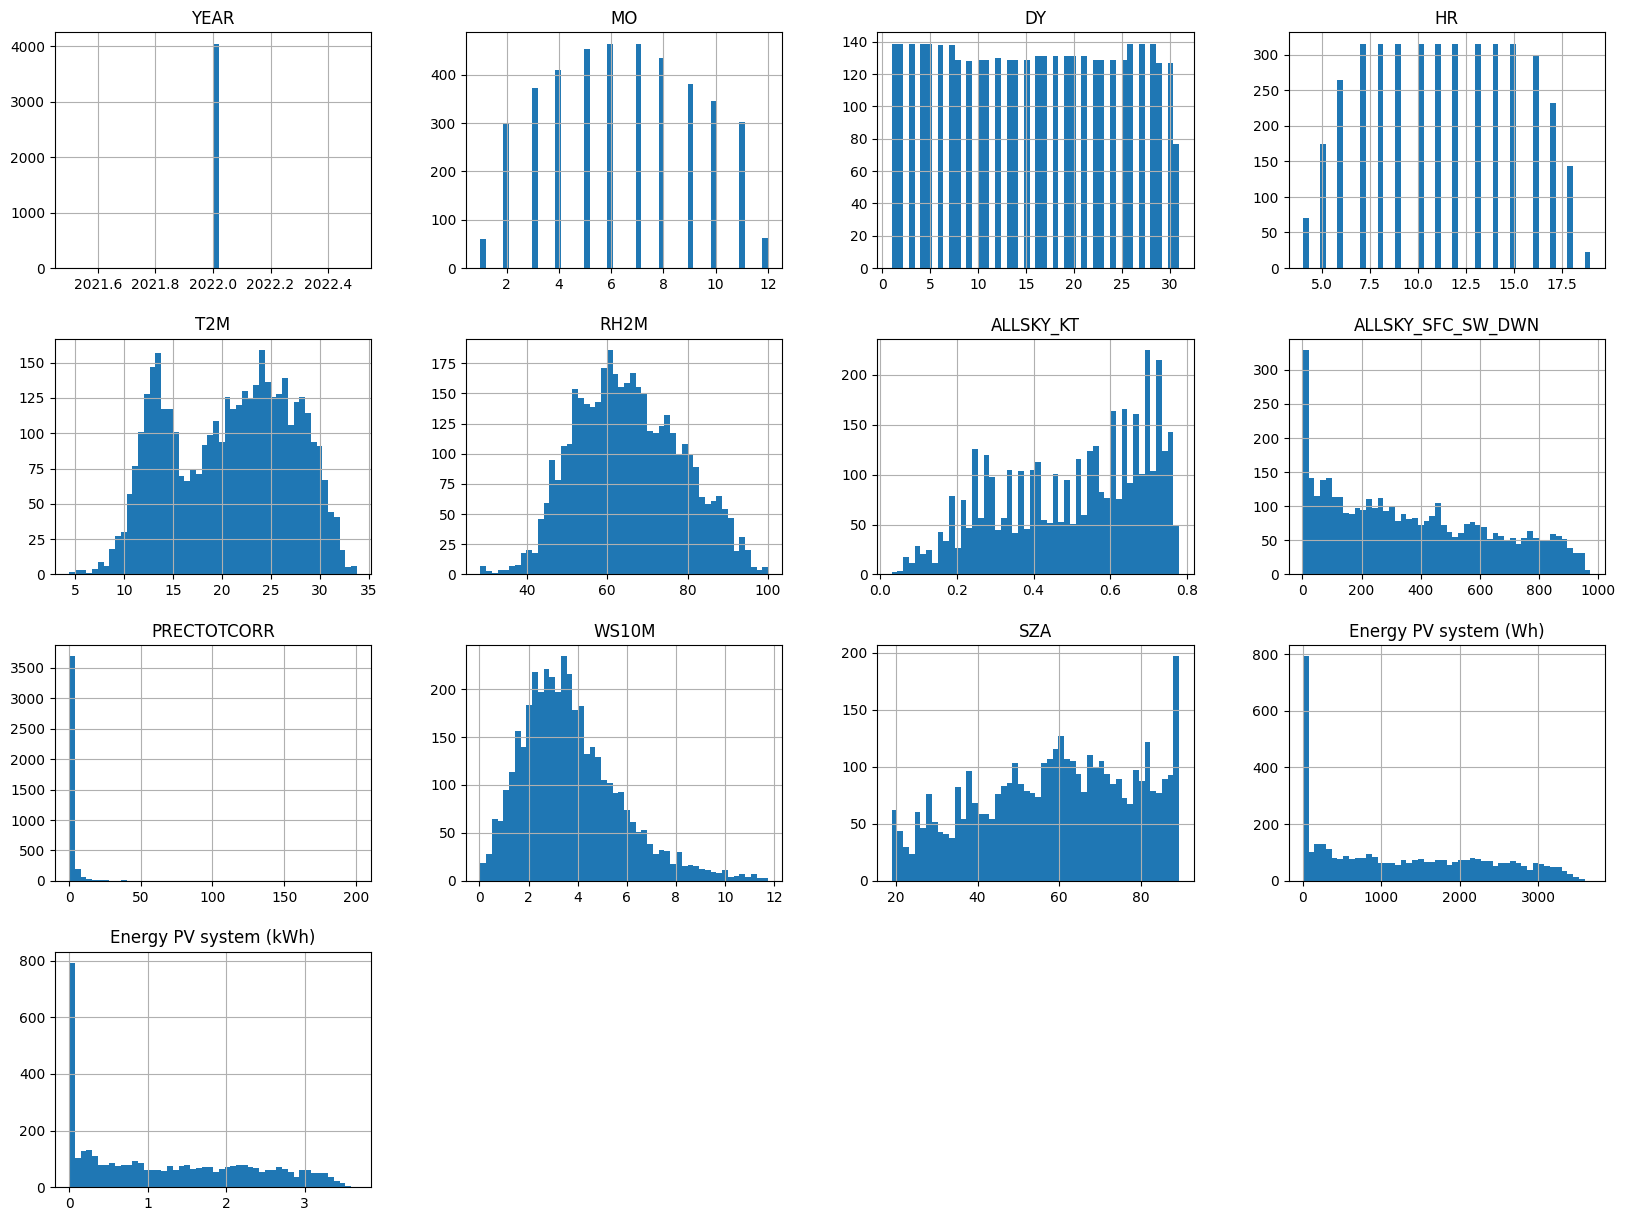

In [429]:
gen_true['ALLSKY_KT'] = gen_true['ALLSKY_KT'].replace(-999, np.nan)

gen_true.hist(bins=50, figsize=(20,15))

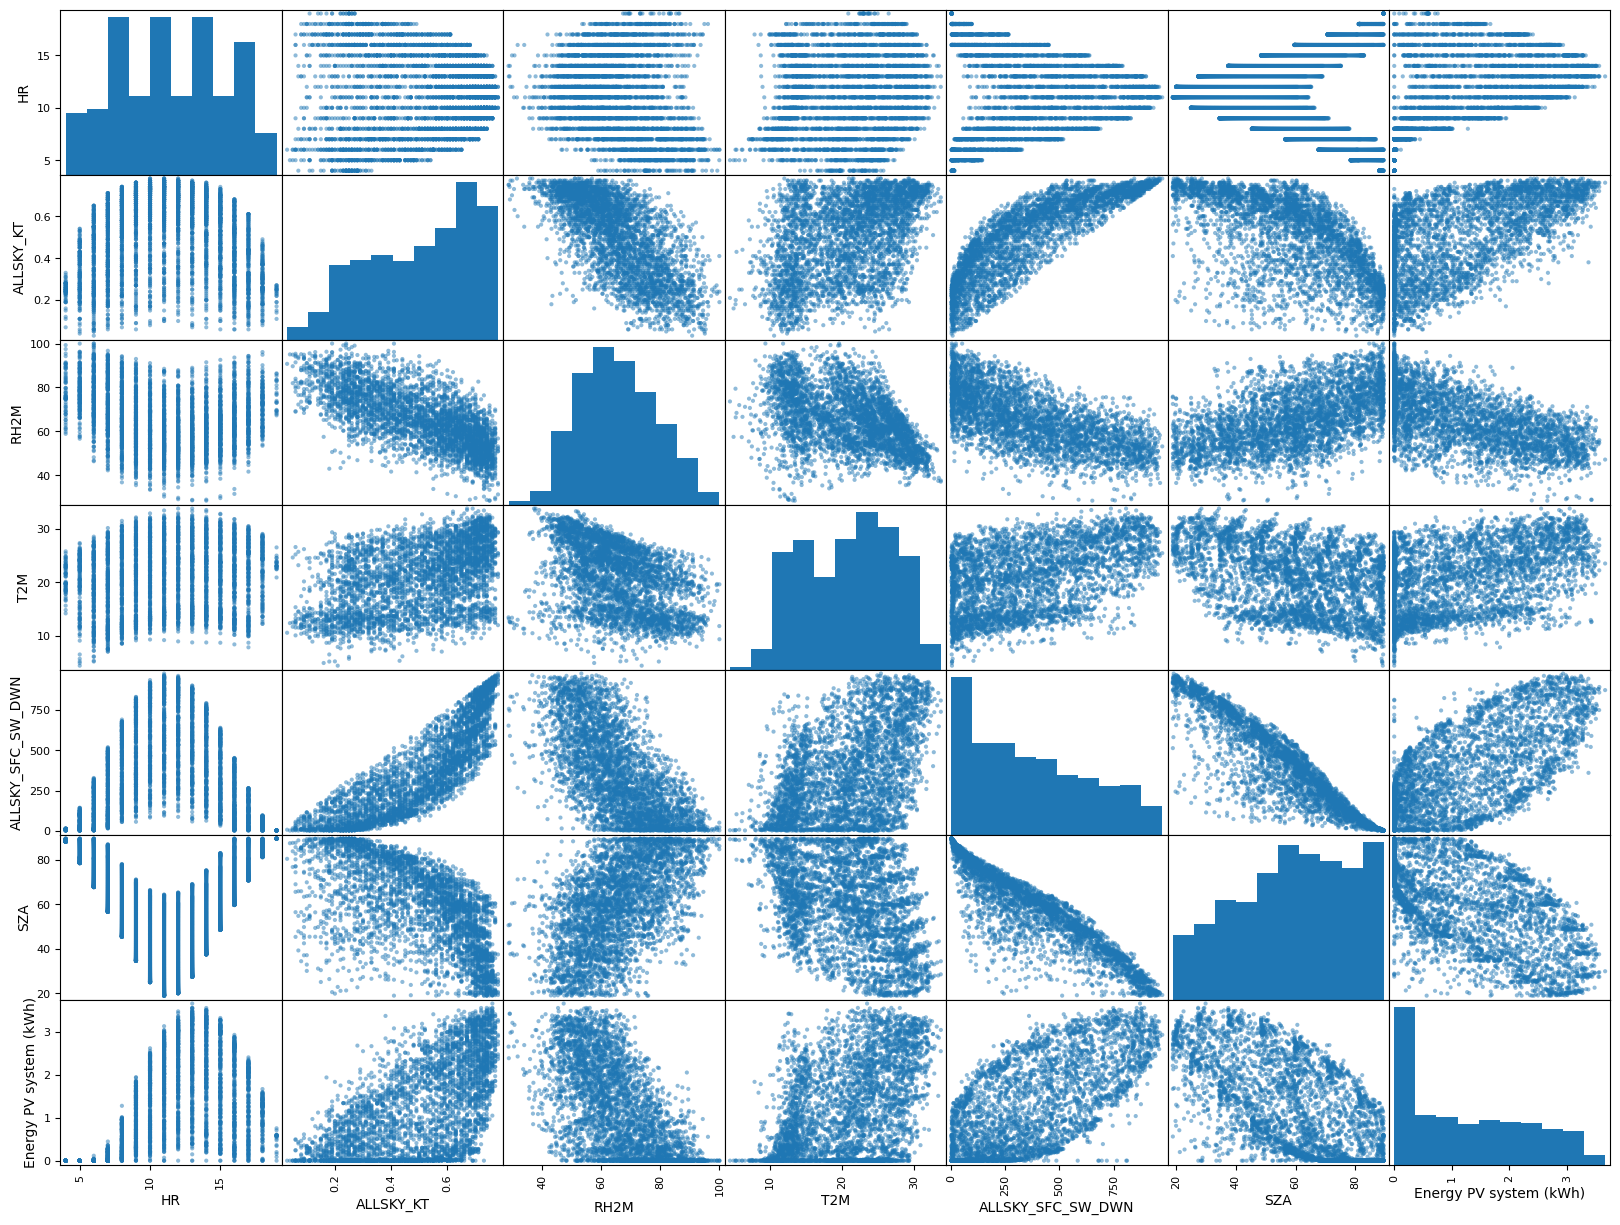

In [430]:
from pandas.plotting import scatter_matrix

attributes = ['HR', 'ALLSKY_KT', 'RH2M', 'T2M', 'ALLSKY_SFC_SW_DWN', 'SZA', 'Energy PV system (kWh)']
scatter_matrix(gen_true[attributes], figsize=(20,15))
plt.show()

Podemos sacar varias conclusiones:
* Es una **zona húmeda**
* La generación es mejor con poca humedad
* Es una zona con **poco viento**
* El viento no es lo más indicativo (igual correlación fuerte con temp del panel)
* Hay más generación en los meses de verano
* La irradiancia es el **valor que más afecta**

In [431]:
gen_params = gen_true[attributes]
gen_params.describe()

,HR,ALLSKY_KT,RH2M,T2M,ALLSKY_SFC_SW_DWN,SZA,Energy PV system (kWh)
count,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000
mean,11.300271,0.500851,65.459561,20.805186,370.036718,59.074952,1.255027
std,3.827266,0.187935,13.014638,6.192921,273.215164,19.216815,1.068839
min,4.000000,0.030000,28.520000,4.410000,1.700000,18.970000,0.000000
25%,8.000000,0.340000,55.580000,15.000000,123.850000,45.010000,0.215000
50%,11.000000,0.540000,64.740000,21.430000,324.600000,60.330000,1.068000
75%,15.000000,0.670000,74.920000,25.920000,583.080000,74.850000,2.167000
max,19.000000,0.780000,100.000000,33.740000,974.350000,89.430000,3.664000


In [ ]:
from sklearn.model_selection import train_test_split

num_gen = gen_params.select_dtypes(include=[np.number])
num_gen = num_gen.drop(columns=['YEAR'])

x_train, x_test = train_test_split(num_gen, test_size=0.2, random_state=42, shuffle=False)


## Viendo correlaciones de los parámetros
Vamos a usar `corr_matrix` para ver las correlaciones de los parámetros y **elegir los mejores parámetros**

In [440]:
gen_params = x_train.copy()
corr_matrix = gen_params.corr()
corr_matrix['Energy PV system (kWh)'].sort_values(ascending=False)

Energy PV system (kWh)    1.000000
ALLSKY_SFC_SW_DWN         0.692925
ALLSKY_KT                 0.623596
HR                        0.541067
T2M                       0.400207
SZA                      -0.610541
RH2M                     -0.611616
Name: Energy PV system (kWh), dtype: float64

# Entrenando y probando diferentes modelos

In [446]:
gen_params = x_train.drop('Energy PV system (kWh)', axis=1)
gen_labels = x_train['Energy PV system (kWh)'].copy()

## `Random Forest Regressor`

In [447]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(gen_params, gen_labels)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [448]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

gen_predictions = forest_reg.predict(gen_params)
gen_mse = mean_squared_error(gen_labels, gen_predictions)
forest_rmse = np.sqrt(gen_mse)

print("Algoritmo de generación RMSE:", forest_rmse)

Algoritmo de generación RMSE: 0.13881378874722883


In [449]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [453]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

gen_test = x_test.drop(columns=['Energy PV system (kWh)'])
gen_test_labels = x_test['Energy PV system (kWh)'].copy()

tcsv = TimeSeriesSplit(n_splits=5)
forest_scores = cross_val_score(forest_reg, gen_test, gen_test_labels, scoring="neg_mean_squared_error", cv=tcsv)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.27045247 0.33963545 0.56964373 0.37873192 0.22277304]
Mean: 0.35624732051912494
Standard deviation: 0.11957899365745234


In [463]:
param_grid = [
    {'n_estimators': [3, 10, 30, 100, 500], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_depth': [None, 10, 20, 30]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=tcsv, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(gen_params, gen_labels)

,estimator,RandomForestRegressor()
,param_grid,"[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_depth': [None, 10, ...], 'n_estimators': [3, 10]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,TimeSeriesSpl...est_size=None)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,500


In [464]:
print(np.sqrt(-grid_search.best_score_))

0.44817167668605157


In [465]:
final_model = grid_search.best_estimator_
X_test = x_test.drop('Energy PV system (kWh)', axis=1)
y_test = x_test['Energy PV system (kWh)'].copy()
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Final RMSE:", final_rmse)

Final RMSE: 0.48834736965453024


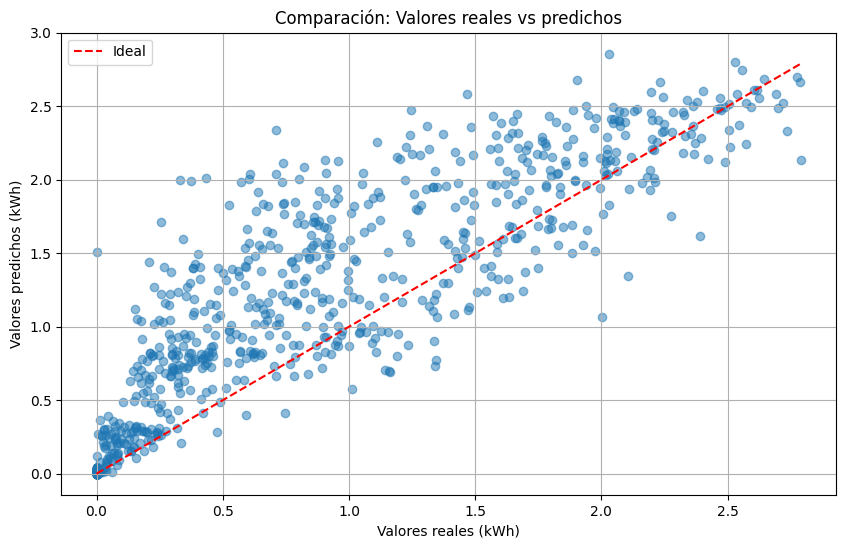

In [466]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, final_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel('Valores reales (kWh)')
plt.ylabel('Valores predichos (kWh)')
plt.title('Comparación: Valores reales vs predichos')
plt.legend()
plt.grid()
plt.show()

In [459]:
# Comparar con diferentes splits temporales
split_points = [0.7, 0.75, 0.8, 0.85]
for split in split_points:
    idx = int(len(num_gen) * split)
    X_temp = num_gen.iloc[idx:].drop('Energy PV system (kWh)', axis=1)
    y_temp = num_gen.iloc[idx:]['Energy PV system (kWh)']
    
    pred_temp = final_model.predict(X_temp)
    rmse_temp = np.sqrt(mean_squared_error(y_temp, pred_temp))
    print(f"RMSE con split {split:.1%}: {rmse_temp:.4f}")

RMSE con split 70.0%: 0.2810
RMSE con split 75.0%: 0.1917
RMSE con split 80.0%: 0.0937
RMSE con split 85.0%: 0.0764


In [460]:
# Analizar el contexto de los errores
print("=== ANÁLISIS DEL ERROR RMSE ===")
print(f"RMSE promedio: ~0.32 kWh")
print(f"Generación promedio: {y_test.mean():.2f} kWh")
print(f"Error relativo: {(0.32 / y_test.mean() * 100):.1f}%")
print(f"Desviación estándar real: {y_test.std():.2f} kWh")
print(f"Ratio RMSE/STD: {(0.32 / y_test.std()):.2f}")

# Rangos de generación
print(f"\nRango de generación:")
print(f"Mínima: {y_test.min():.2f} kWh")
print(f"Máxima: {y_test.max():.2f} kWh")
print(f"Error como % del rango: {(0.32 / (y_test.max() - y_test.min()) * 100):.1f}%")

=== ANÁLISIS DEL ERROR RMSE ===
RMSE promedio: ~0.32 kWh
Generación promedio: 0.86 kWh
Error relativo: 37.2%
Desviación estándar real: 0.77 kWh
Ratio RMSE/STD: 0.41

Rango de generación:
Mínima: 0.00 kWh
Máxima: 2.79 kWh
Error como % del rango: 11.5%


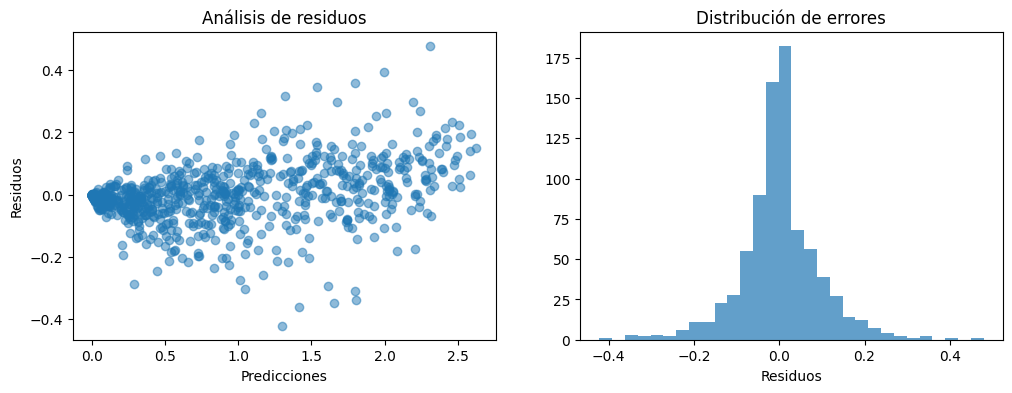

In [461]:
# Analizar dónde falla más el modelo
residuals = y_test - final_predictions
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(final_predictions, residuals, alpha=0.5)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Análisis de residuos')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, alpha=0.7)
plt.xlabel('Residuos')
plt.title('Distribución de errores')
plt.show()

## `XGBoost`

In [ ]:
import xgboost as xgb

# 1. XGBoost básico (CORREGIDO)
xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(gen_params, gen_labels)

# NO evaluar en train, mejor usar cross-validation directamente
xgb_scores = cross_val_score(xgb_reg, gen_params, gen_labels, 
                            scoring="neg_mean_squared_error", cv=tcsv)
xgb_rmse_scores = np.sqrt(-xgb_scores)
print("XGBoost Cross-Val RMSE:")
display_scores(xgb_rmse_scores)

XGBoost Cross-Val RMSE:
Scores: [0.4444511  0.52098238 0.52293977 0.36459196 0.35401745 0.38456718
 0.62130311 0.41977071]
Mean: 0.454077956853493
Standard deviation: 0.08753832150288311


In [ ]:
param_grid = {  # Diccionario simple, NO lista
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_grid_search = GridSearchCV(xgb_reg, param_grid, cv=tcsv, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)
xgb_grid_search.fit(gen_params, gen_labels)
print("Mejores parámetros XGBoost:")
print(xgb_grid_search.best_params_)
print(f"Mejor CV RMSE: {np.sqrt(-xgb_grid_search.best_score_):.4f}")

Mejores parámetros XGBoost:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}
Mejor CV RMSE: 0.4268


In [ ]:
final_model_xgb = xgb_grid_search.best_estimator_
X_test = x_test.drop('Energy PV system (kWh)', axis=1)
y_test = x_test['Energy PV system (kWh)'].copy()
final_predictions_xgb = final_model_xgb.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Final RMSE:", final_rmse)

Final RMSE: 0.4856785301522257


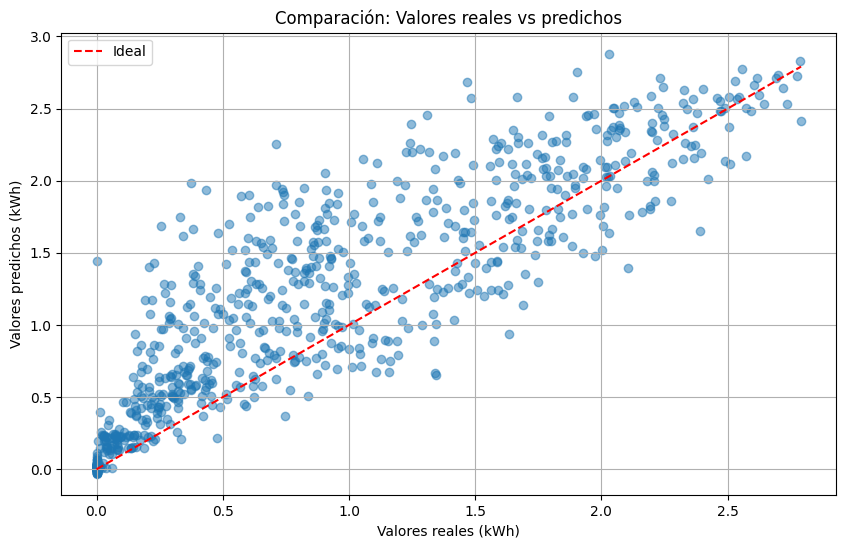

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, final_predictions_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel('Valores reales (kWh)')
plt.ylabel('Valores predichos (kWh)')
plt.title('Comparación: Valores reales vs predichos')
plt.legend()
plt.grid()
plt.show()

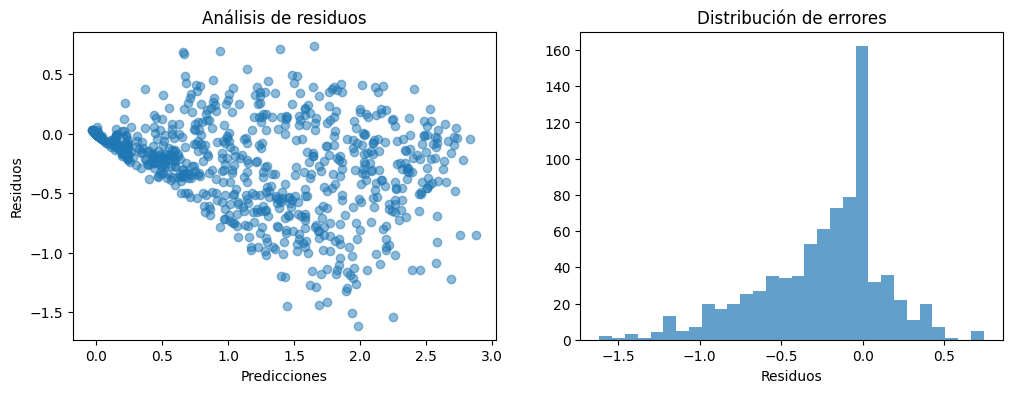

In [ ]:
# Analizar dónde falla más el modelo
residuals = y_test - final_predictions_xgb
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(final_predictions_xgb, residuals, alpha=0.5)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Análisis de residuos')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, alpha=0.7)
plt.xlabel('Residuos')
plt.title('Distribución de errores')
plt.show()

## Combinación de ambos

In [ ]:
# Ensemble que combine lo mejor de ambos
from sklearn.ensemble import VotingRegressor

# Usar RF como base y XGB como apoyo
ensemble_optimized = VotingRegressor([
    ('rf_best', grid_search.best_estimator_),
    ('xgb_support', xgb_grid_search.best_estimator_)
], weights=[2, 1])  # 75% RF, 25% XGB

ensemble_optimized.fit(gen_params, gen_labels)
ensemble_predictions = ensemble_optimized.predict(X_test)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))
print(f"Ensemble RMSE: {ensemble_rmse:.4f}")

Ensemble RMSE: 0.4744


### *Feature Engineering*

In [ ]:
# Feature Engineering para bajar aún más el error
# Crear features de interacción específicas para solar
X_train_enhanced = gen_params.copy()
X_test_enhanced = X_test.copy()

# Features solares avanzadas
#X_train_enhanced['solar_efficiency'] = X_train_enhanced['ALLSKY_SFC_SW_DWN'] / (X_train_enhanced['T2M'] + 273.15)
#X_train_enhanced['humidity_temp'] = X_train_enhanced['RH2M'] * X_train_enhanced['T2M']
#X_train_enhanced['clear_irradiance'] = X_train_enhanced['ALLSKY_KT'] * X_train_enhanced['ALLSKY_SFC_SW_DWN']
X_train_enhanced['hour_sin'] = np.sin(2 * np.pi * X_train_enhanced['HR'] / 24)
X_train_enhanced['hour_cos'] = np.cos(2 * np.pi * X_train_enhanced['HR'] / 24)
X_train_enhanced['month_sin'] = np.sin(2 * np.pi * X_train_enhanced['MO'] / 12)
X_train_enhanced['month_cos'] = np.cos(2 * np.pi * X_train_enhanced['MO'] / 12)
X_train_enhanced['clarity_temp'] = X_train_enhanced['ALLSKY_SFC_SW_DWN'] * X_train_enhanced['T2M']





#X_test_enhanced['solar_efficiency'] = X_test_enhanced['ALLSKY_SFC_SW_DWN'] / (X_test_enhanced['T2M'] + 273.15)
#X_test_enhanced['humidity_temp'] = X_test_enhanced['RH2M'] * X_test_enhanced['T2M']
#X_test_enhanced['clear_irradiance'] = X_test_enhanced['ALLSKY_KT'] * X_test_enhanced['ALLSKY_SFC_SW_DWN']
X_test_enhanced['hour_sin'] = np.sin(2 * np.pi * X_test_enhanced['HR'] / 24)
X_test_enhanced['hour_cos'] = np.cos(2 * np.pi * X_test_enhanced['HR'] / 24)
X_test_enhanced['month_sin'] = np.sin(2 * np.pi * X_test_enhanced['MO'] / 12)
X_test_enhanced['month_cos'] = np.cos(2 * np.pi * X_test_enhanced['MO'] / 12)
X_test_enhanced['clarity_temp'] = X_test_enhanced['ALLSKY_SFC_SW_DWN'] * X_test_enhanced['T2M']



# Entrenar ensemble con features mejoradas
ensemble_enhanced = VotingRegressor([
    ('rf_best', grid_search.best_estimator_),
    ('xgb_support', xgb_grid_search.best_estimator_)
], weights=[2, 1])

ensemble_enhanced.fit(X_train_enhanced, gen_labels)
ensemble_predictions = ensemble_enhanced.predict(X_test_enhanced)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))
print(f"Ensemble RMSE: {ensemble_rmse:.4f}")

KeyError: 'MO'

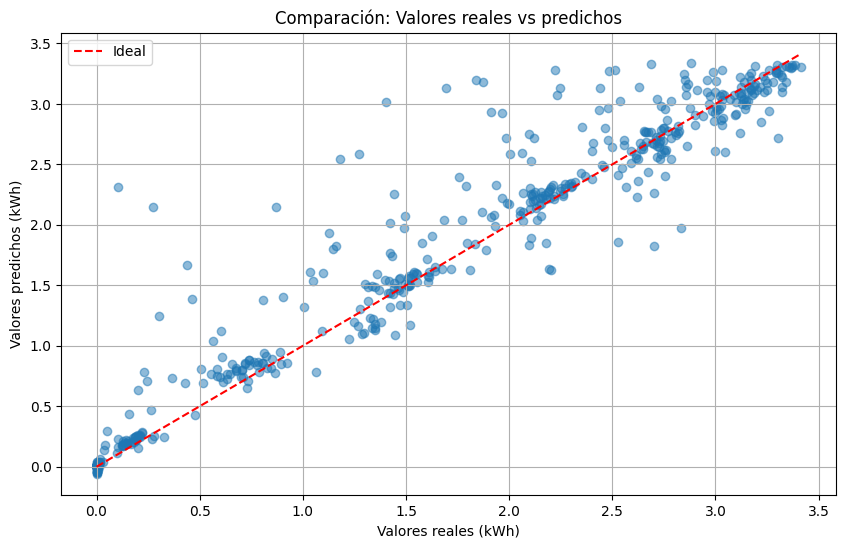

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, ensemble_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel('Valores reales (kWh)')
plt.ylabel('Valores predichos (kWh)')
plt.title('Comparación: Valores reales vs predichos')
plt.legend()
plt.grid()

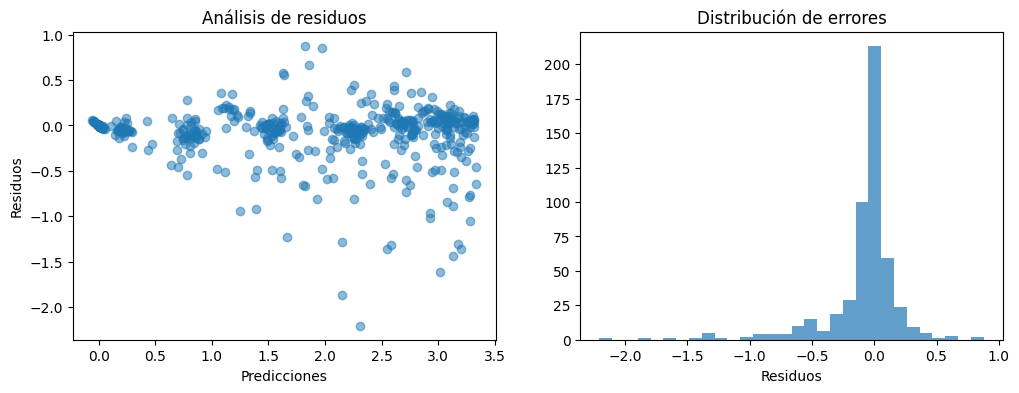

In [ ]:
# Analizar dónde falla más el modelo
residuals = y_test - ensemble_predictions
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(ensemble_predictions, residuals, alpha=0.5)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Análisis de residuos')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, alpha=0.7)
plt.xlabel('Residuos')
plt.title('Distribución de errores')
plt.show()